(From Project Page, https://www.superdatascience.com/workshops/case-study-013-python-us-working-visa-analysis)

Disclaimer: the dataset of Labor Condition Application used in this case study was downloaded from United States Department of Labor website. The dataset has minors modifications from the website version to  simplify the analysis in this case study, but it can be downloaded in its original form here.

The dataset containing NAICS (North America Industry Classification System) codes was downloaded from data.gov website.

And the populations of US states was extracted from this Wikipedia page and stored as a csv file. You are a Data Scientist conducting a research of how US companies hire and apply for working visa for foreign workers. Your objective is to find interesting patterns in given data.

You have been supplied with three real datasets:

The result of 2016 applications for H1B visas;
NAICS codes;
US States;

Your analysis must be able to address the following questions:

    1) What are the top 10 occupations for H1B visas with certified status?
    2) Which company hires more data scientists?
    3) What is the average salary for data scientists? How it is compared to the mean of applications?
    4) Which state has the higher deny proportionally to application. And proportionally to the population?
    5) What industries are in the top 5 percentile of applications?
    6) Does the month of the application play any role in to denied process? What about decision dates?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
applications = pd.read_csv("H-1B disclosure data.csv", low_memory=False, encoding="latin1")

In [3]:
applications.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149
1,I-200-10138-949973,CERTIFIED-WITHDRAWN,11-03-16,28-11-16,H-1B,07-09-16,06-09-19,"WEST-CAMP PRESS, INC.",OH,43081,STAFF ACCOUNTANT,13-2011,ACCOUNTANTS AND AUDITORS,323119,45698
2,I-200-11045-306092,WITHDRAWN,05-12-16,05-12-16,H-1B,12-12-16,30-06-19,"FUTURETECH CONSULTANTS, L.L.C",GA,30092,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,60341
3,I-200-11080-460161,CERTIFIED-WITHDRAWN,03-02-15,31-10-16,H-1B,09-02-15,08-02-18,CONOCOPHILLIPS COMPANY,TX,77079,PETROPHYSICIST,19-4041,GEOLOGICAL AND PETROLEUM TECHNICIANS,324110,65520
4,I-200-12047-839355,CERTIFIED-WITHDRAWN,27-02-15,07-10-16,H-1B,29-08-15,28-08-18,"SUNERA TECHNOLOGIES, INC",MI,48083,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,5415,68578


## Questions to answer:
 - 1) What are the top 10 occupations for H1B visas with certified status?
 - 2) Which company hires more data scientists?
 - 3) What is the average salary for data scientists? How it is compared to the mean of applications?
 - 4) Which state has the higher deny proportionally to application. And proportionally to the population?
 - 5) What industries are in the top 5 percentile of applications?
 - 6) Does the month of the application play any role in to denied process? What about decision dates?

### 1) What are the top 10 occupations for H1B visas with certified status?

In [4]:
certified = applications[(applications.CASE_STATUS == "CERTIFIED") | (applications.CASE_STATUS =="CERTIFIED-WITHDRAWN")]

certified.groupby("SOC_NAME").SOC_NAME.count().nlargest(10)

SOC_NAME
SOFTWARE DEVELOPERS, APPLICATIONS              18369
COMPUTER SYSTEMS ANALYSTS                      13866
COMPUTER PROGRAMMERS                           11005
COMPUTER OCCUPATIONS, ALL OTHER                 7133
COMPUTER SYSTEMS ANALYST                        3387
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE           2814
MANAGEMENT ANALYSTS                             1784
ACCOUNTANTS AND AUDITORS                        1657
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS     1299
FINANCIAL ANALYSTS                              1148
Name: SOC_NAME, dtype: int64

In [5]:
certified.groupby("JOB_TITLE").JOB_TITLE.count().nlargest(10)

JOB_TITLE
PROGRAMMER ANALYST          6203
SOFTWARE ENGINEER           3758
SOFTWARE DEVELOPER          1758
SYSTEMS ANALYST             1393
SENIOR SOFTWARE ENGINEER    1327
COMPUTER PROGRAMMER         1018
BUSINESS ANALYST             861
DEVELOPER                    744
ASSISTANT PROFESSOR          736
COMPUTER SYSTEMS ANALYST     736
Name: JOB_TITLE, dtype: int64

## 2) Which company hires more data scientists?

In [6]:
certified[certified.JOB_TITLE == "DATA SCIENTIST"].count()

CASE_NUMBER              159
CASE_STATUS              159
CASE_SUBMITTED           159
DECISION_DATE            159
VISA_CLASS               159
EMPLOYMENT_START_DATE    159
EMPLOYMENT_END_DATE      159
EMPLOYER_NAME            159
EMPLOYER_STATE           159
EMPLOYER_POSTAL_CODE     159
JOB_TITLE                159
SOC_CODE                 159
SOC_NAME                 159
NAICS_CODE               159
PREVAILING_WAGE          159
dtype: int64

In [7]:
data_scientists = certified[certified.JOB_TITLE == "DATA SCIENTIST"]

data_scientists.groupby("EMPLOYER_NAME").EMPLOYER_NAME.count().nlargest(5)

EMPLOYER_NAME
MICROSOFT CORPORATION                  40
FACEBOOK, INC.                         12
UBER TECHNOLOGIES, INC.                 5
INTEL CORPORATION                       4
SCHLUMBERGER TECHNOLOGY CORPORATION     4
Name: EMPLOYER_NAME, dtype: int64

## 3) What is the average salary for data scientists? How it is compared to the mean of applications?

In [8]:
data_scientists["PREVAILING_WAGE"].mean()

88384.46540880503

In [9]:
applications["PREVAILING_WAGE"].mean()

75734.58793153218

## 4) Which state has the higher deny proportionally to application. And proportionally to the population?

In [10]:
applications["CASE_STATUS"].unique()

array(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'DENIED'],
      dtype=object)

In [11]:
populations = pd.read_csv("states population.csv")

In [12]:
populations.head()

,State abbreviation,State,Population estimate
0,CA,California,39250017
1,TX,Texas,27862596
2,FL,Florida,20612439
3,NY,New York,19745289
4,PA,Pennsylvania,12802503


In [13]:
applications = pd.merge(applications, populations, how="left", left_on="EMPLOYER_STATE", right_on="State abbreviation")
applications.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,State abbreviation,State,Population estimate
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149,CA,California,39250017.0
1,I-200-10138-949973,CERTIFIED-WITHDRAWN,11-03-16,28-11-16,H-1B,07-09-16,06-09-19,"WEST-CAMP PRESS, INC.",OH,43081,STAFF ACCOUNTANT,13-2011,ACCOUNTANTS AND AUDITORS,323119,45698,OH,Ohio,11614373.0
2,I-200-11045-306092,WITHDRAWN,05-12-16,05-12-16,H-1B,12-12-16,30-06-19,"FUTURETECH CONSULTANTS, L.L.C",GA,30092,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,60341,GA,Georgia,10310371.0
3,I-200-11080-460161,CERTIFIED-WITHDRAWN,03-02-15,31-10-16,H-1B,09-02-15,08-02-18,CONOCOPHILLIPS COMPANY,TX,77079,PETROPHYSICIST,19-4041,GEOLOGICAL AND PETROLEUM TECHNICIANS,324110,65520,TX,Texas,27862596.0
4,I-200-12047-839355,CERTIFIED-WITHDRAWN,27-02-15,07-10-16,H-1B,29-08-15,28-08-18,"SUNERA TECHNOLOGIES, INC",MI,48083,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,5415,68578,MI,Michigan,9928301.0


In [14]:
denied = pd.DataFrame(applications[applications.CASE_STATUS == "DENIED"].groupby("EMPLOYER_STATE").CASE_STATUS.count())
denied.reset_index(inplace=True)
denied

,EMPLOYER_STATE,CASE_STATUS
0,AK,1
1,AL,6
2,AR,4
3,AS,1
4,AZ,14
5,CA,257
6,CO,15
7,CT,14
8,DC,9
9,DE,12


In [15]:
total_cases = pd.DataFrame(applications.groupby("EMPLOYER_STATE").CASE_STATUS.count())
total_cases.reset_index(inplace=True)
total_cases

,EMPLOYER_STATE,CASE_STATUS
0,AK,12
1,AL,127
2,AR,339
3,AS,1
4,AZ,527
5,CA,15293
6,CO,645
7,CT,883
8,DC,303
9,DE,297


In [17]:
cases_by_state = pd.merge(total_cases, denied, on="EMPLOYER_STATE")
cases_by_state.set_axis(["EMPLOYER_STATE", "Total_Cases", "Cases_Denied"], axis=1, inplace=True)
cases_by_state

,EMPLOYER_STATE,Total_Cases,Cases_Denied
0,AK,12,1
1,AL,127,6
2,AR,339,4
3,AS,1,1
4,AZ,527,14
5,CA,15293,257
6,CO,645,15
7,CT,883,14
8,DC,303,9
9,DE,297,12


In [18]:
cases_by_state["DENIED_BY_CASES"] = cases_by_state["Cases_Denied"]/cases_by_state["Total_Cases"]
cases_by_state

,EMPLOYER_STATE,Total_Cases,Cases_Denied,DENIED_BY_CASES
0,AK,12,1,0.083333
1,AL,127,6,0.047244
2,AR,339,4,0.011799
3,AS,1,1,1.000000
4,AZ,527,14,0.026565
5,CA,15293,257,0.016805
6,CO,645,15,0.023256
7,CT,883,14,0.015855
8,DC,303,9,0.029703
9,DE,297,12,0.040404


In [19]:
cases_by_state = pd.merge(cases_by_state, populations, how="left", left_on="EMPLOYER_STATE", right_on="State abbreviation")
cases_by_state

,EMPLOYER_STATE,Total_Cases,Cases_Denied,DENIED_BY_CASES,State abbreviation,State,Population estimate
0,AK,12,1,0.083333,AK,Alaska,741894.0
1,AL,127,6,0.047244,AL,Alabama,4863300.0
2,AR,339,4,0.011799,AR,Arkansas,2988248.0
3,AS,1,1,1.000000,NaN,NaN,NaN
4,AZ,527,14,0.026565,AZ,Arizona,6931071.0
5,CA,15293,257,0.016805,CA,California,39250017.0
6,CO,645,15,0.023256,CO,Colorado,5540545.0
7,CT,883,14,0.015855,CT,Connecticut,3576452.0
8,DC,303,9,0.029703,NaN,NaN,NaN
9,DE,297,12,0.040404,DE,Delaware,952065.0


In [20]:
cases_by_state["DENIED_BY_POP"] = cases_by_state["Cases_Denied"]/cases_by_state["Population estimate"]
cases_by_state

,EMPLOYER_STATE,Total_Cases,Cases_Denied,DENIED_BY_CASES,State abbreviation,State,Population estimate,DENIED_BY_POP
0,AK,12,1,0.083333,AK,Alaska,741894.0,1.347901e-06
1,AL,127,6,0.047244,AL,Alabama,4863300.0,1.233730e-06
2,AR,339,4,0.011799,AR,Arkansas,2988248.0,1.338577e-06
3,AS,1,1,1.000000,NaN,NaN,NaN,NaN
4,AZ,527,14,0.026565,AZ,Arizona,6931071.0,2.019890e-06
5,CA,15293,257,0.016805,CA,California,39250017.0,6.547768e-06
6,CO,645,15,0.023256,CO,Colorado,5540545.0,2.707315e-06
7,CT,883,14,0.015855,CT,Connecticut,3576452.0,3.914494e-06
8,DC,303,9,0.029703,NaN,NaN,NaN,NaN
9,DE,297,12,0.040404,DE,Delaware,952065.0,1.260418e-05


In [21]:
cases_by_state.drop(columns=["Total_Cases", "Cases_Denied", "State abbreviation", "State", "Population estimate"], inplace=True)
cases_by_state

,EMPLOYER_STATE,DENIED_BY_CASES,DENIED_BY_POP
0,AK,0.083333,1.347901e-06
1,AL,0.047244,1.233730e-06
2,AR,0.011799,1.338577e-06
3,AS,1.000000,NaN
4,AZ,0.026565,2.019890e-06
5,CA,0.016805,6.547768e-06
6,CO,0.023256,2.707315e-06
7,CT,0.015855,3.914494e-06
8,DC,0.029703,NaN
9,DE,0.040404,1.260418e-05


In [107]:
cases_by_state.sort_values(by="DENIED_BY_CASES", ascending=False)

,EMPLOYER_STATE,DENIED_BY_CASES,DENIED_BY_POP
3,AS,1.000000,NaN
26,MP,0.226667,NaN
13,HI,0.130435,6.300064e-06
27,MT,0.117647,1.918428e-06
0,AK,0.083333,1.347901e-06
33,NV,0.070312,3.061164e-06
38,PR,0.058824,NaN
22,ME,0.054054,3.004178e-06
1,AL,0.047244,1.233730e-06
12,GU,0.042254,NaN


In [22]:
cases_by_state.sort_values(by="DENIED_BY_POP", ascending=False)

,EMPLOYER_STATE,DENIED_BY_CASES,DENIED_BY_POP
9,DE,0.040404,1.260418e-05
31,NJ,0.008083,1.006208e-05
34,NY,0.024826,8.305779e-06
39,RI,0.040816,7.572703e-06
20,MA,0.014462,7.046617e-06
45,WA,0.012094,6.586169e-06
5,CA,0.016805,6.547768e-06
13,HI,0.130435,6.300064e-06
37,PA,0.020788,6.014449e-06
44,VA,0.015907,5.230742e-06


In [23]:
visas = pd.merge(applications, cases_by_state, on="EMPLOYER_STATE")
visas

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,State abbreviation,State,Population estimate,DENIED_BY_CASES,DENIED_BY_POP
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149,CA,California,39250017.0,0.016805,0.000007
1,I-200-12062-026161,CERTIFIED-WITHDRAWN,14-02-14,21-10-16,H-1B,13-06-14,12-06-17,"2WIRE, INC.",CA,95131,SENIOR SOFTWARE ENGINEER,15-1133,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",5415,103106,CA,California,39250017.0,0.016805,0.000007
2,I-200-13101-800756,WITHDRAWN,12-04-13,05-10-16,H-1B,01-10-13,30-09-16,"A2Z DEVELOPMENT CENTER, INC.",CA,95014,HARDWARE DEVELOPMENT ENGINEER II,17-2061,COMPUTER HARDWARE ENGINEERS,425110,104645,CA,California,39250017.0,0.016805,0.000007
3,I-200-13189-205446,CERTIFIED-WITHDRAWN,10-11-14,22-12-16,H-1B,29-01-15,28-01-18,CALIFORNIA INSTITUTE OF TECHNOLOGY,CA,91125,RESEARCHER,19-2031,CHEMISTS,611310,45510,CA,California,39250017.0,0.016805,0.000007
4,I-200-13189-612623,CERTIFIED-WITHDRAWN,13-10-14,16-11-16,H-1B,21-01-15,20-01-18,CALIFORNIA INSTITUTE OF TECHNOLOGY,CA,91125,ASSOCIATE PROFESSOR,19-2011,ASTRONOMERS,611310,76898,CA,California,39250017.0,0.016805,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93033,I-203-16281-445450,CERTIFIED,07-10-16,14-10-16,E-3 Australian,01-11-16,31-10-18,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,CHIEF ADVISOR,Nov-21,CONSTRUCTION MANAGERS,72112,66680,NaN,NaN,NaN,0.226667,NaN
93034,I-203-16334-499628,CERTIFIED,29-11-16,05-12-16,E-3 Australian,15-12-16,14-12-18,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,MANAGER-IT GAMING SOLUTIONS,Nov-21,COMPUTER AND INFORMATION SYSTEMS MANAGERS,72112,80160,NaN,NaN,NaN,0.226667,NaN
93035,I-203-16334-681819,CERTIFIED,29-11-16,05-12-16,E-3 Australian,15-12-16,14-12-18,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,DIRECTOR OF PROJECTS & FACILITY MANAGEMENT,Nov-21,CONSTRUCTION MANAGERS,72112,87400,NaN,NaN,NaN,0.226667,NaN
93036,I-203-16355-246356,CERTIFIED,20-12-16,27-12-16,E-3 Australian,02-01-17,01-01-19,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,SHIFT MANAGER- LOYALTY CLUB,11-1021,GENERAL AND OPERATIONS MANAGERS,72112,11,NaN,NaN,NaN,0.226667,NaN


## 5) What industries are in the top 5 percentile of applications?

In [24]:
naics = pd.read_csv("naics codes.csv", encoding="latin1")
naics.head()

,NAICS Code,NAICS Title,Unnamed: 2
0,11,"Agriculture, Forestry, Fishing and Hunting",NaN
1,21,"Mining, Quarrying, and Oil and Gas Extraction",NaN
2,22,Utilities,NaN
3,23,Construction,NaN
4,42,Wholesale Trade,NaN


In [25]:
naics = naics[["NAICS Code", "NAICS Title"]]
naics.columns = ["NAICS_CODE", "NAICS_TITLE"]
naics

,NAICS_CODE,NAICS_TITLE
0,11,"Agriculture, Forestry, Fishing and Hunting"
1,21,"Mining, Quarrying, and Oil and Gas Extraction"
2,22,Utilities
3,23,Construction
4,42,Wholesale Trade
...,...,...
4668,927110,Space Research and Technology
4669,928110,National Security
4670,928110,National Security
4671,928120,International Affairs


In [26]:
naics.groupby("NAICS_CODE").count().reset_index().sort_values(by="NAICS_TITLE", ascending=False).head()

,NAICS_CODE,NAICS_TITLE
1219,113310,4
1926,441320,4
1911,424920,4
1912,424930,4
1914,424950,4


In [27]:
naics.drop_duplicates(subset=["NAICS_CODE"], keep="first", inplace=True)

In [28]:
industries = pd.merge(visas, naics, how="left", on="NAICS_CODE")
industries = industries.groupby(industries["NAICS_TITLE"]).CASE_NUMBER.count()
industries = industries[industries >= industries.quantile(0.95)]
industries.sort_values(ascending=False)

NAICS_TITLE
Custom Computer Programming Services                                                                31921
Computer Systems Design and Related Services                                                         6685
Computer Systems Design Services                                                                     5300
Colleges, Universities, and Professional Schools                                                     4960
Management, Scientific, and Technical Consulting Services                                            3689
Software Publishers                                                                                  2638
Other Computer Related Services                                                                      1850
Offices of Certified Public Accountants                                                              1475
Engineering Services                                                                                 1403
Administrative Management and Gene

## 6) Does the month of the application play any role in to denied process? What about decision dates?

In [29]:
visas.groupby(visas.CASE_SUBMITTED).CASE_STATUS.count()

CASE_SUBMITTED
01-02-16     22
01-03-14      5
01-03-15      2
01-03-16     46
01-04-14      5
           ... 
31-10-16    964
31-12-13      1
31-12-14      2
31-12-15      2
31-12-16      1
Name: CASE_STATUS, Length: 958, dtype: int64

In [30]:
visas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93038 entries, 0 to 93037
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CASE_NUMBER            93038 non-null  object 
 1   CASE_STATUS            93038 non-null  object 
 2   CASE_SUBMITTED         93038 non-null  object 
 3   DECISION_DATE          93038 non-null  object 
 4   VISA_CLASS             93038 non-null  object 
 5   EMPLOYMENT_START_DATE  93034 non-null  object 
 6   EMPLOYMENT_END_DATE    93037 non-null  object 
 7   EMPLOYER_NAME          93032 non-null  object 
 8   EMPLOYER_STATE         93038 non-null  object 
 9   EMPLOYER_POSTAL_CODE   93038 non-null  object 
 10  JOB_TITLE              93038 non-null  object 
 11  SOC_CODE               93038 non-null  object 
 12  SOC_NAME               93038 non-null  object 
 13  NAICS_CODE             93038 non-null  int64  
 14  PREVAILING_WAGE        93038 non-null  int64  
 15  St

In [31]:
visas["CASE_SUBMITTED"]= pd.to_datetime(visas["CASE_SUBMITTED"])
visas["DECISION_DATE"] = pd.to_datetime(visas["DECISION_DATE"])
visas

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,State abbreviation,State,Population estimate,DENIED_BY_CASES,DENIED_BY_POP
0,I-200-09209-039181,CERTIFIED,2016-09-27,2016-03-10,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149,CA,California,39250017.0,0.016805,0.000007
1,I-200-12062-026161,CERTIFIED-WITHDRAWN,2014-02-14,2016-10-21,H-1B,13-06-14,12-06-17,"2WIRE, INC.",CA,95131,SENIOR SOFTWARE ENGINEER,15-1133,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",5415,103106,CA,California,39250017.0,0.016805,0.000007
2,I-200-13101-800756,WITHDRAWN,2013-12-04,2016-05-10,H-1B,01-10-13,30-09-16,"A2Z DEVELOPMENT CENTER, INC.",CA,95014,HARDWARE DEVELOPMENT ENGINEER II,17-2061,COMPUTER HARDWARE ENGINEERS,425110,104645,CA,California,39250017.0,0.016805,0.000007
3,I-200-13189-205446,CERTIFIED-WITHDRAWN,2014-10-11,2016-12-22,H-1B,29-01-15,28-01-18,CALIFORNIA INSTITUTE OF TECHNOLOGY,CA,91125,RESEARCHER,19-2031,CHEMISTS,611310,45510,CA,California,39250017.0,0.016805,0.000007
4,I-200-13189-612623,CERTIFIED-WITHDRAWN,2014-10-13,2016-11-16,H-1B,21-01-15,20-01-18,CALIFORNIA INSTITUTE OF TECHNOLOGY,CA,91125,ASSOCIATE PROFESSOR,19-2011,ASTRONOMERS,611310,76898,CA,California,39250017.0,0.016805,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93033,I-203-16281-445450,CERTIFIED,2016-07-10,2016-10-14,E-3 Australian,01-11-16,31-10-18,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,CHIEF ADVISOR,Nov-21,CONSTRUCTION MANAGERS,72112,66680,NaN,NaN,NaN,0.226667,NaN
93034,I-203-16334-499628,CERTIFIED,2016-11-29,2016-05-12,E-3 Australian,15-12-16,14-12-18,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,MANAGER-IT GAMING SOLUTIONS,Nov-21,COMPUTER AND INFORMATION SYSTEMS MANAGERS,72112,80160,NaN,NaN,NaN,0.226667,NaN
93035,I-203-16334-681819,CERTIFIED,2016-11-29,2016-05-12,E-3 Australian,15-12-16,14-12-18,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,DIRECTOR OF PROJECTS & FACILITY MANAGEMENT,Nov-21,CONSTRUCTION MANAGERS,72112,87400,NaN,NaN,NaN,0.226667,NaN
93036,I-203-16355-246356,CERTIFIED,2016-12-20,2016-12-27,E-3 Australian,02-01-17,01-01-19,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,SHIFT MANAGER- LOYALTY CLUB,11-1021,GENERAL AND OPERATIONS MANAGERS,72112,11,NaN,NaN,NaN,0.226667,NaN


In [32]:
visas.groupby(visas["CASE_SUBMITTED"])

In [33]:
import datetime as dt
visas["MONTH_SUBMITTED"] = visas["CASE_SUBMITTED"].dt.month
visas["DEC_MONTH"] = visas["DECISION_DATE"].dt.month
visas

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,...,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,State abbreviation,State,Population estimate,DENIED_BY_CASES,DENIED_BY_POP,MONTH_SUBMITTED,DEC_MONTH
0,I-200-09209-039181,CERTIFIED,2016-09-27,2016-03-10,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,...,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149,CA,California,39250017.0,0.016805,0.000007,9,3
1,I-200-12062-026161,CERTIFIED-WITHDRAWN,2014-02-14,2016-10-21,H-1B,13-06-14,12-06-17,"2WIRE, INC.",CA,95131,...,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",5415,103106,CA,California,39250017.0,0.016805,0.000007,2,10
2,I-200-13101-800756,WITHDRAWN,2013-12-04,2016-05-10,H-1B,01-10-13,30-09-16,"A2Z DEVELOPMENT CENTER, INC.",CA,95014,...,COMPUTER HARDWARE ENGINEERS,425110,104645,CA,California,39250017.0,0.016805,0.000007,12,5
3,I-200-13189-205446,CERTIFIED-WITHDRAWN,2014-10-11,2016-12-22,H-1B,29-01-15,28-01-18,CALIFORNIA INSTITUTE OF TECHNOLOGY,CA,91125,...,CHEMISTS,611310,45510,CA,California,39250017.0,0.016805,0.000007,10,12
4,I-200-13189-612623,CERTIFIED-WITHDRAWN,2014-10-13,2016-11-16,H-1B,21-01-15,20-01-18,CALIFORNIA INSTITUTE OF TECHNOLOGY,CA,91125,...,ASTRONOMERS,611310,76898,CA,California,39250017.0,0.016805,0.000007,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93033,I-203-16281-445450,CERTIFIED,2016-07-10,2016-10-14,E-3 Australian,01-11-16,31-10-18,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,...,CONSTRUCTION MANAGERS,72112,66680,NaN,NaN,NaN,0.226667,NaN,7,10
93034,I-203-16334-499628,CERTIFIED,2016-11-29,2016-05-12,E-3 Australian,15-12-16,14-12-18,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,...,COMPUTER AND INFORMATION SYSTEMS MANAGERS,72112,80160,NaN,NaN,NaN,0.226667,NaN,11,5
93035,I-203-16334-681819,CERTIFIED,2016-11-29,2016-05-12,E-3 Australian,15-12-16,14-12-18,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,...,CONSTRUCTION MANAGERS,72112,87400,NaN,NaN,NaN,0.226667,NaN,11,5
93036,I-203-16355-246356,CERTIFIED,2016-12-20,2016-12-27,E-3 Australian,02-01-17,01-01-19,IMPERIAL PACIFIC INTERNATIONAL CNMI,MP,96950,...,GENERAL AND OPERATIONS MANAGERS,72112,11,NaN,NaN,NaN,0.226667,NaN,12,12


In [34]:
by_month = visas.groupby(["MONTH_SUBMITTED", "CASE_STATUS"]).CASE_STATUS.count()
by_month = by_month.to_frame(name="COUNT")
by_month = by_month.unstack(level=1)
by_month.columns = ["CERTIFIED", "CERTIFIED-WITHDRAWN", "DENIED", "WITHDRAWN"]
by_month.reset_index(inplace=True)
by_month

,MONTH_SUBMITTED,CERTIFIED,CERTIFIED-WITHDRAWN,DENIED,WITHDRAWN
0,1,2450,608,38,138
1,2,2587,935,44,182
2,3,2410,1824,39,208
3,4,2707,660,42,175
4,5,2683,544,47,152
5,6,2888,1014,51,143
6,7,3767,660,73,200
7,8,2497,609,44,122
8,9,7336,864,103,176
9,10,17056,833,308,602


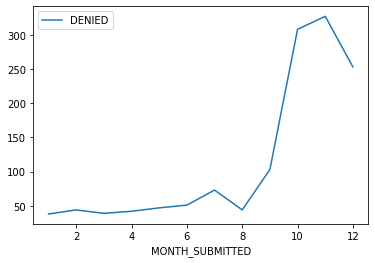

In [35]:
by_month.plot(x="MONTH_SUBMITTED",y="DENIED");

In [36]:
dec_month = visas.groupby(["DEC_MONTH", "CASE_STATUS"]).CASE_STATUS.count()
dec_month = dec_month.to_frame(name="COUNT")
dec_month = dec_month.unstack(level=1)
dec_month.columns = ["CERTIFIED", "CERTIFIED-WITHDRAWN", "DENIED", "WITHDRAWN"]
dec_month.reset_index(inplace=True)
dec_month

,DEC_MONTH,CERTIFIED,CERTIFIED-WITHDRAWN,DENIED,WITHDRAWN
0,1,1567,271,53,122
1,2,2583,241,36,100
2,3,2509,320,40,98
3,4,2146,349,51,98
4,5,2155,305,55,97
5,6,2652,399,44,128
6,7,3573,501,61,166
7,8,2643,361,39,102
8,9,2493,293,46,83
9,10,18032,3222,322,797


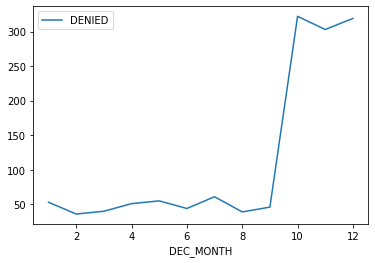

In [37]:
dec_month.plot(x="DEC_MONTH",y="DENIED");